<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#The-HiC_data-object" data-toc-modified-id="The-HiC_data-object-1">The HiC_data object</a></span></li><li><span><a href="#Filter-columns-with-too-few-interaction-count" data-toc-modified-id="Filter-columns-with-too-few-interaction-count-2">Filter columns with too few interaction count</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-3">Normalization</a></span><ul class="toc-item"><li><span><a href="#Other-normalizations" data-toc-modified-id="Other-normalizations-3.1">Other normalizations</a></span></li></ul></li><li><span><a href="#Save-raw-and-normalized-matrices" data-toc-modified-id="Save-raw-and-normalized-matrices-4">Save raw and normalized matrices</a></span><ul class="toc-item"><li><span><a href="#Save-biases-and-bin-filtering" data-toc-modified-id="Save-biases-and-bin-filtering-4.1">Save biases and bin filtering</a></span></li><li><span><a href="#Save-normalized-chromosome/genome-matrices" data-toc-modified-id="Save-normalized-chromosome/genome-matrices-4.2">Save normalized chromosome/genome matrices</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-5">References</a></span></li></ul></div>

# The HiC_data object

In [1]:
from pytadbit.parsers.hic_parser import load_hic_data_from_reads

In [2]:
cell = 'mouse_B'
rep = 'rep1'
reso = 1000000

In [3]:
hic_data = load_hic_data_from_reads(
    'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep),
    reso)

# Filter columns with too few interaction count

For this, very sparse, example dataset we are going to ask for very few interactions per bin.

This can be done either by setting `min_perc` asking for each bin to contain a minimum percentage of cells with interaction data. Or but setting `min_count` asking that the number of cells with interaction data of each bin is above the defined cutoff.


     1     2     3    68   197   198   199   373   379   380   381   382   540   541   542   543   671   698   699   700
   792   850   851   852   999  1000  1001  1002  1009  1021  1022  1146  1147  1148  1276  1277  1278  1401  1402  1403
  1532  1533  1534  1605  1619  1620  1654  1655  1656  1657  1775  1776  1777  1778  1897  1898  1899  2022  2023  2024
  2126  2127  2128  2129  2145  2226  2227  2228  2260  2261  2263  2321  2322  2323  2412  2413  2414  2474  2475  2476
  2501  2502  2503  2504  2599  2622  2644  2645  2646  2649  2650  2651  2652  2653  2654  2655  2656  2657  2658  2659
  2660  2661  2662  2663  2664  2665  2666  2667  2668  2669  2670  2671  2672  2673  2674  2675  2676  2677  2678  2679
  2680  2681  2682  2683  2684  2685  2686  2687  2688  2689  2690  2691  2692  2693  2694  2695  2696  2697  2698  2699
  2700  2701  2702  2703  2704  2705  2706  2707  2708  2709  2710  2711  2712  2713  2714  2715  2716  2717  2718  2719
  2720  2721  2722  2723  2724 

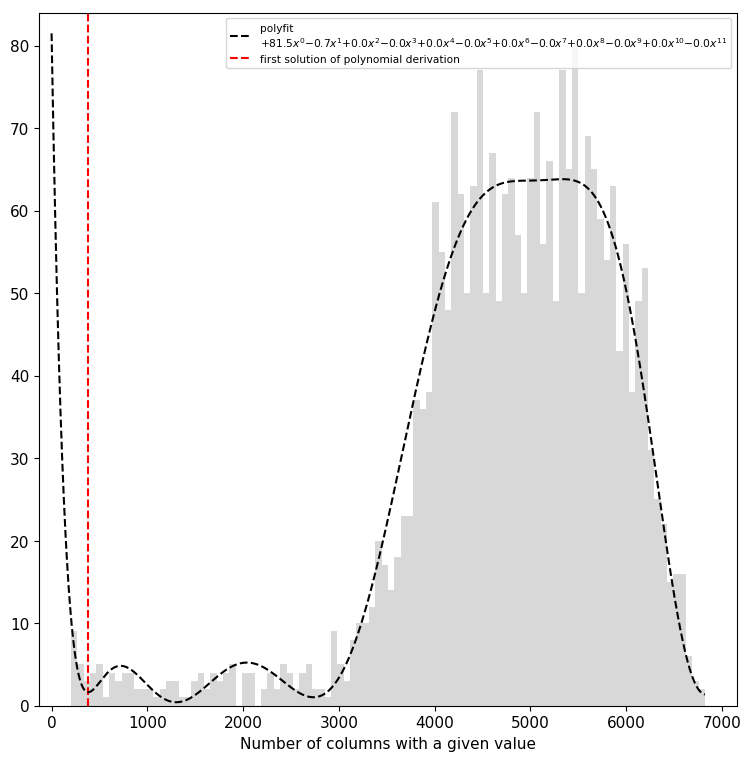

Found 195 of 2738 columns with poor signal


/home/fransua/.miniconda2/lib/python2.7/site-packages/pytadbit/utils/hic_filtering.py:149: ComplexWarning: Casting complex values to real discards the imaginary part
  round(root, 3), ' '.join(

     1     2     3    67    68    69   197   198   199   373   379   380   381   382   540   541   542   543   601   602
   671   698   699   700   792   850   851   852   999  1000  1001  1002  1008  1009  1021  1022  1146  1147  1148  1276
  1277  1278  1401  1402  1403  1532  1533  1534  1602  1605  1619  1620  1621  1654  1655  1656  1657  1677  1775  1776
  1777  1778  1897  1898  1899  1900  1939  2022  2023  2024  2126  2127  2128  2129  2145  2226  2227  2228  2254  2260
  2261  2262  2263  2321  2322  2323  2412  2413  2414  2474  2475  2476  2501  2502  2503  2504  2508  2599  2622  2623
  2644  2645  2646  2647  2648  2649  2650  2651  2652  2653  2654  2655  2656  2657  2658  2659  2660  2661  2662  2663
  2664  2665  2666  2667  2668  2669  2670  2671  2672  2673  2674  2675  2676 

In [4]:
hic_data.filter_columns(draw_hist=True, min_count=100, by_mean=True)

In [5]:
print len(hic_data)
print len(hic_data.bads)

2738
195


# Normalization

As normalization we use either the ICE normalization <a name="ref-1"/>[(Imakaev et al., 2012)](#cite-Imakaev2012a) with a "full" normalization until the sum of all columns of the matrix are equal, or something more similar to the _vanilla_ normalization used in <a name="ref-2"/>[(Rao et al., 2014)](#cite-Rao2014) which is exactly like running the ICE normalization without iterations.

_Note: if columns with a lot of zeroes are present the ICE normalization will last very long to converge, and these low-coverage columns will present, at the end of the normalization, few cells with very high values of interaction_

In [6]:
hic_data.normalize_hic(iterations=100, max_dev=0.00001)

iterative correction
  - copying matrix
  - computing biases
           391.000        4839.686        6822.000    0   0.91921
          4032.493        4976.949       14529.260    1   1.91931
          2578.636        5017.076        5652.792    2   0.48603
          4676.743        5028.482        7336.037    3   0.45890
          4001.836        5032.587        5247.720    4   0.20482
          4909.266        5034.101        5759.116    5   0.14402
          4644.238        5034.704        5110.243    6   0.07755
          4990.164        5034.946        5281.603    7   0.04899
          4893.336        5035.047        5061.930    8   0.02814
          5019.014        5035.088        5121.185    9   0.01710
          4984.536        5035.106        5044.774   10   0.01004
          5029.254        5035.114        5065.394   11   0.00601
          5017.207        5035.117        5038.749   12   0.00356
          5032.813        5035.118        5045.777   13   0.00212
          5028.

At 100 kb itmakes no sense to view the full matrix (your matrix will have more cells than your screen have pixels).

Try plotting a region of the genome only, with the `focus` parameter.

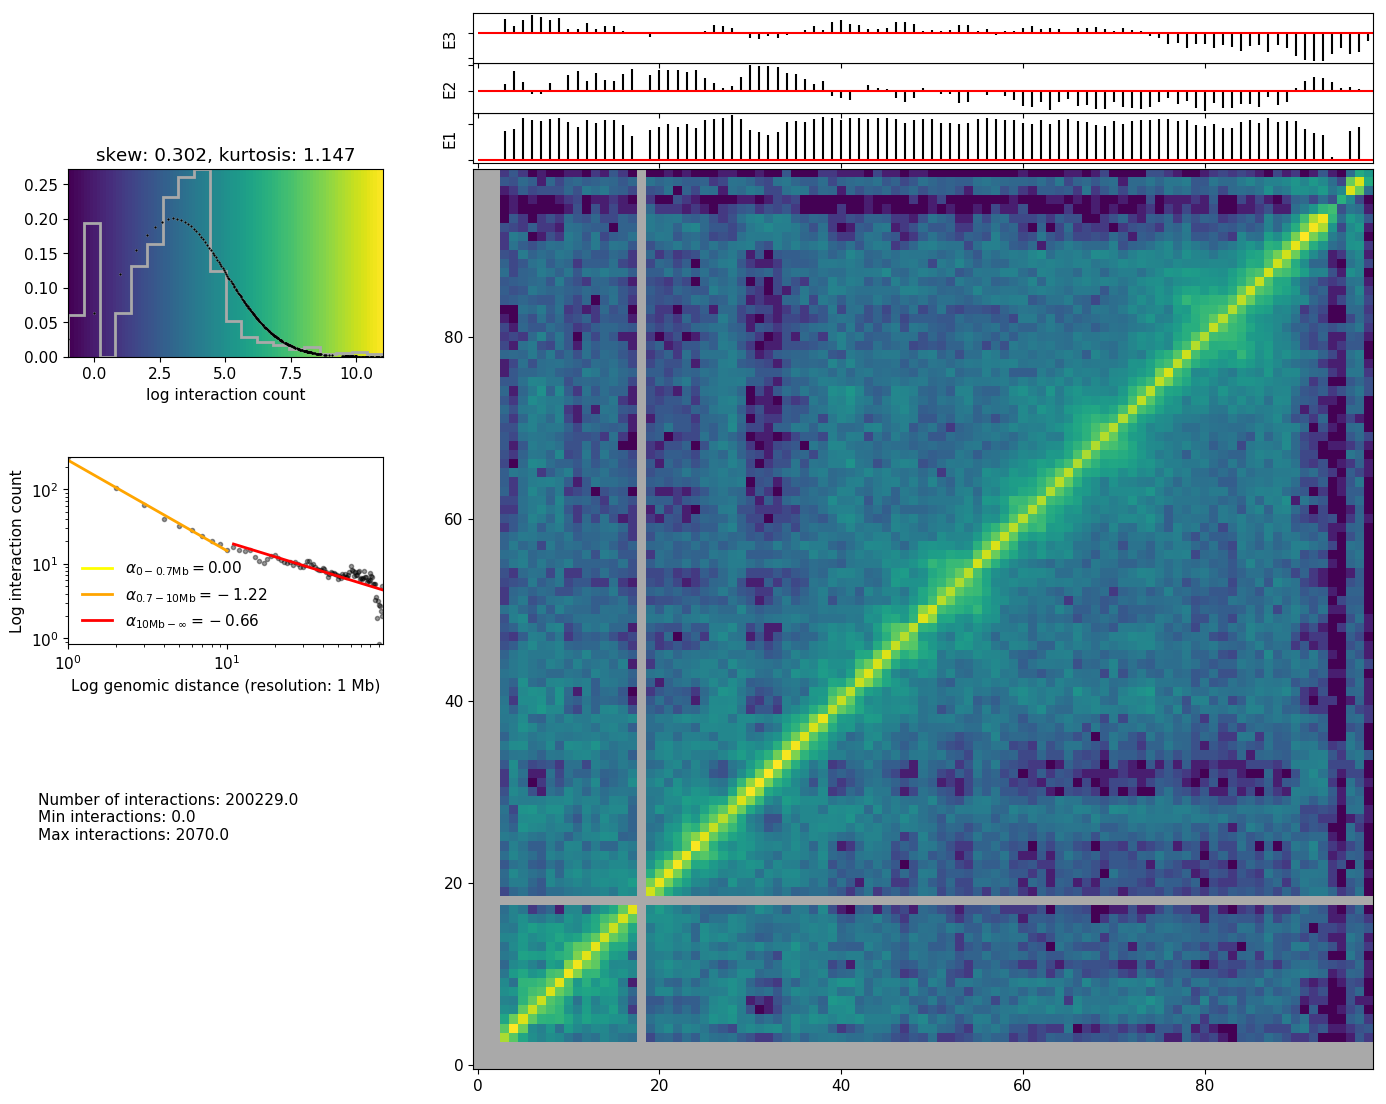

In [7]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data, normalized=False, focus='chr16', show=True, cmap='viridis')

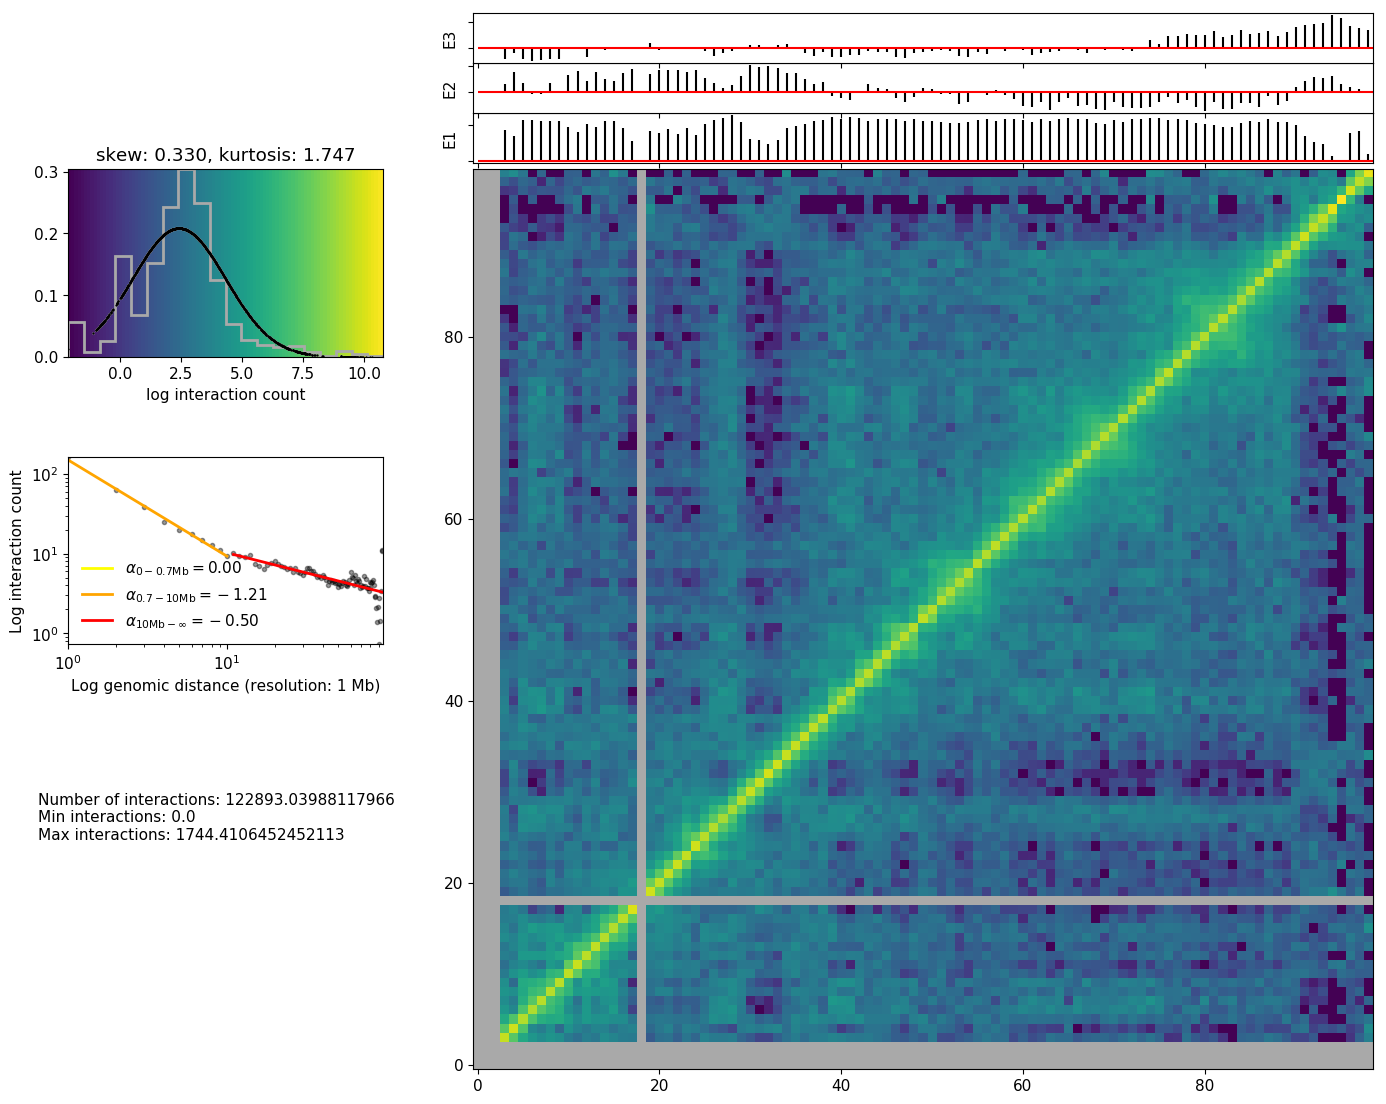

In [8]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data, normalized=True, focus='chr16', show=True, cmap='viridis')

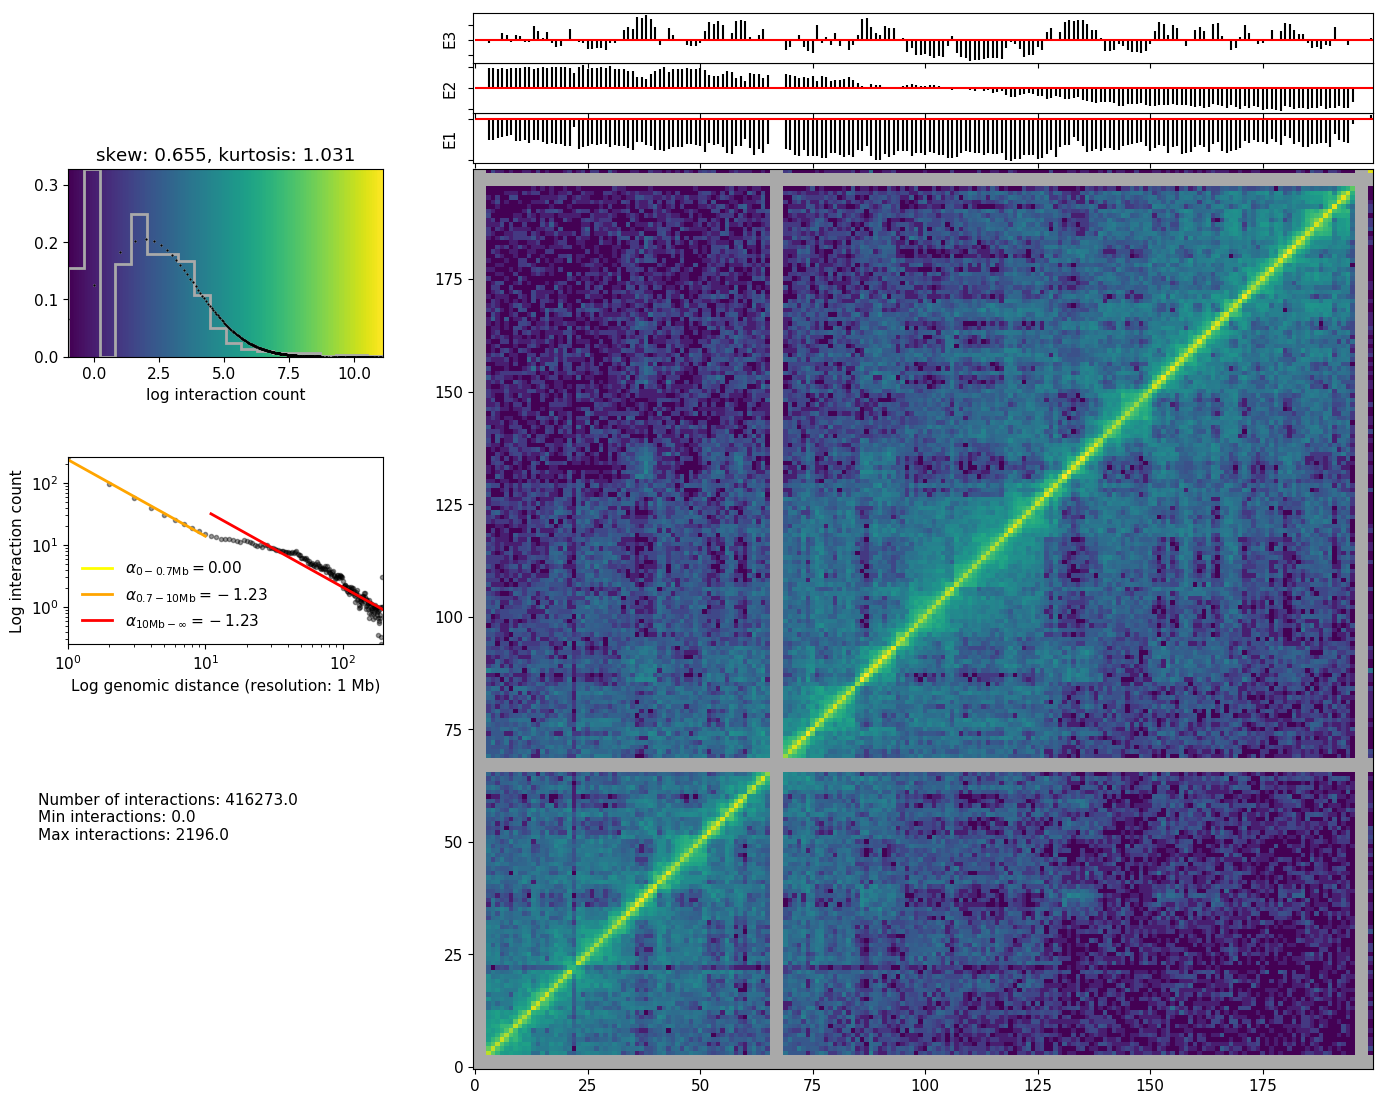

In [9]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data, normalized=False, focus=(1, 200), show=True, cmap='viridis')

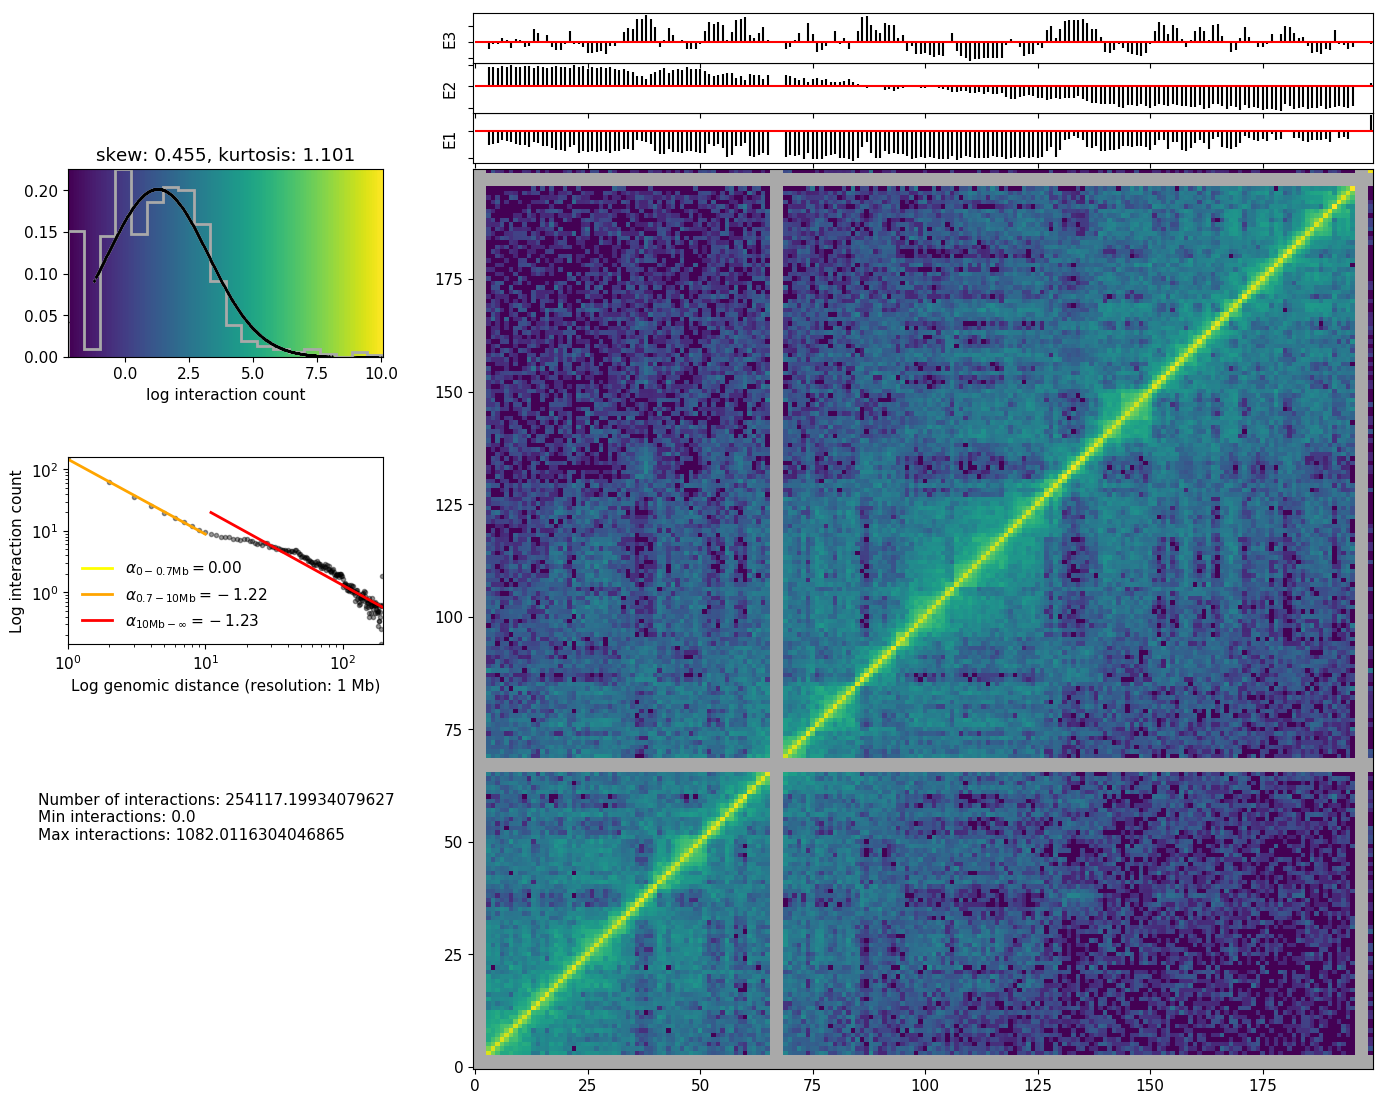

In [10]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data, normalized=True, focus=(1, 200), show=True, cmap='viridis')

## Other normalizations

ICE normalization is widely used however other, more convaluted, normalizations <a name="ref-1"/>[(Hu et al., 2012)](#cite-hu2012hicnorm) <a name="ref-2"/>[(Yaffe and Tanay, 2011)](#cite-Yaffe2011) can be used outside TADbit and then added as normalized matrices.

# Save raw and normalized matrices

## Save biases and bin filtering

In [127]:
from cPickle import dump

In [128]:
! mkdir -p results/fragment/$cell\_$rep/04_normalizing

Save biases to separate file.

In [129]:
out = open('results/fragment/{1}_{2}/04_normalizing/biases_{0}_{1}_{2}.pick'.format(reso, cell, rep), 'w')
dump(hic_data.bias, out)
out.close()

Save "bad" columns to an other file

In [130]:
out = open('results/fragment/{1}_{2}/04_normalizing/bad_columns_{0}_{1}_{2}.pick'.format(reso, cell, rep), 'w')
dump(hic_data.bads, out)
out.close()

## Save normalized chromosome/genome matrices

This time we do not need to save appart the normalization biases and the list of columns with poor signal.

In [15]:
hic_map(hic_data, by_chrom='intra', normalized=False,
       savedata='results/fragment/{1}_{2}/04_normalizing/{0}_raw'.format(reso, cell, rep))

In [16]:
hic_map(hic_data, by_chrom='intra', normalized=True,
       savedata='results/fragment/{1}_{2}/04_normalizing/{0}_norm'.format(reso, cell, rep))

If the resolution is not to low, we could also save genomic matrices:

In [17]:
if reso >= 300000:
    hic_map(hic_data, by_chrom=False, normalized=False,
            savedata='results/fragment/{1}_{2}/04_normalizing/{0}_raw.mat'.format(reso, cell, rep))

    hic_map(hic_data, by_chrom=False, normalized=True,
            savedata='results/fragment/{1}_{2}/04_normalizing/{0}_norm.mat'.format(reso, cell, rep))

<!--bibtex
@article{hu2012hicnorm,
  title={HiCNorm: removing biases in Hi-C data via Poisson regression},
  author={Hu, Ming and Deng, Ke and Selvaraj, Siddarth and Qin, Zhaohui and Ren, Bing and Liu, Jun S},
  journal={Bioinformatics},
  volume={28},
  number={23},
  pages={3131--3133},
  year={2012},
  publisher={Oxford Univ Press}
}
@article{Yaffe2011,
abstract = {Hi-C experiments measure the probability of physical proximity between pairs of chromosomal loci on a genomic scale. We report on several systematic biases that substantially affect the Hi-C experimental procedure, including the distance between restriction sites, the GC content of trimmed ligation junctions and sequence uniqueness. To address these biases, we introduce an integrated probabilistic background model and develop algorithms to estimate its parameters and renormalize Hi-C data. Analysis of corrected human lymphoblast contact maps provides genome-wide evidence for interchromosomal aggregation of active chromatin marks, including DNase-hypersensitive sites and transcriptionally active foci. We observe extensive long-range (up to 400 kb) cis interactions at active promoters and derive asymmetric contact profiles next to transcription start sites and CTCF binding sites. Clusters of interacting chromosomal domains suggest physical separation of centromere-proximal and centromere-distal regions. These results provide a computational basis for the inference of chromosomal architectures from Hi-C experiments.},
author = {Yaffe, Eitan and Tanay, Amos},
doi = {10.1038/ng.947},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Yaffe, Tanay - 2011 - Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal archit.pdf:pdf},
issn = {1546-1718},
journal = {Nature genetics},
keywords = {Binding Sites,Chromosomes,Cluster Analysis,Epigenesis,Genetic,Human,Humans,Lymphocytes,Lymphocytes: ultrastructure,Models,Probability},
mendeley-groups = {Research articles},
month = {nov},
number = {11},
pages = {1059--65},
pmid = {22001755},
title = {{Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal architecture.}},
url = {http://www.ncbi.nlm.nih.gov/pubmed/22001755},
volume = {43},
year = {2011}
}
@article{Imakaev2012a,
abstract = {Extracting biologically meaningful information from chromosomal interactions obtained with genome-wide chromosome conformation capture (3C) analyses requires the elimination of systematic biases. We present a computational pipeline that integrates a strategy to map sequencing reads with a data-driven method for iterative correction of biases, yielding genome-wide maps of relative contact probabilities. We validate this ICE (iterative correction and eigenvector decomposition) technique on published data obtained by the high-throughput 3C method Hi-C, and we demonstrate that eigenvector decomposition of the obtained maps provides insights into local chromatin states, global patterns of chromosomal interactions, and the conserved organization of human and mouse chromosomes.},
author = {Imakaev, Maxim V and Fudenberg, Geoffrey and McCord, Rachel Patton and Naumova, Natalia and Goloborodko, Anton and Lajoie, Bryan R and Dekker, Job and Mirny, Leonid A},
doi = {10.1038/nmeth.2148},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Imakaev et al. - 2012 - Iterative correction of Hi-C data reveals hallmarks of chromosome organization.pdf:pdf},
issn = {1548-7105},
journal = {Nature methods},
keywords = {Hi-C},
mendeley-groups = {stats/Hi-C,Research articles},
mendeley-tags = {Hi-C},
month = {oct},
number = {10},
pages = {999--1003},
pmid = {22941365},
title = {{Iterative correction of Hi-C data reveals hallmarks of chromosome organization.}},
url = {http://www.ncbi.nlm.nih.gov/pubmed/22941365},
volume = {9},
year = {2012}
}
@article{Rao2014,
author = {Rao, Suhas S P and Huntley, Miriam H and Durand, Neva C and Stamenova, Elena K and Bochkov, Ivan D. and {James T. Robinson} and Sanborn, Adrian L. and Machol, Ido and Omer, Arina D. and Lander, Eric S. and Lieberman-Aiden, Erez},
doi = {10.1016/j.cell.2014.11.021},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Rao et al. - 2014 - A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping.pdf:pdf},
issn = {0092-8674},
journal = {Cell},
keywords = {Hi-C},
mendeley-groups = {Research articles,projects/GEVO/CTCF},
mendeley-tags = {Hi-C},
number = {7},
pages = {1665--1680},
pmid = {25497547},
publisher = {Elsevier Inc.},
title = {{A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping}},
url = {http://dx.doi.org/10.1016/j.cell.2014.11.021},
volume = {159},
year = {2014}
}

-->

# References

<a name="cite-Imakaev2012a"/><sup>[^](#ref-1) </sup>Imakaev, Maxim V and Fudenberg, Geoffrey and McCord, Rachel Patton and Naumova, Natalia and Goloborodko, Anton and Lajoie, Bryan R and Dekker, Job and Mirny, Leonid A. 2012. _Iterative correction of Hi-C data reveals hallmarks of chromosome organization._. [URL](http://www.ncbi.nlm.nih.gov/pubmed/22941365)

<a name="cite-Rao2014"/><sup>[^](#ref-2) </sup>Rao, Suhas S P and Huntley, Miriam H and Durand, Neva C and Stamenova, Elena K and Bochkov, Ivan D. and James T. Robinson and Sanborn, Adrian L. and Machol, Ido and Omer, Arina D. and Lander, Eric S. and Lieberman-Aiden, Erez. 2014. _A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping_. [URL](http://dx.doi.org/10.1016/j.cell.2014.11.021)

<a name="cite-hu2012hicnorm"/><sup>[^](#ref-3) </sup>Hu, Ming and Deng, Ke and Selvaraj, Siddarth and Qin, Zhaohui and Ren, Bing and Liu, Jun S. 2012. _HiCNorm: removing biases in Hi-C data via Poisson regression_.

<a name="cite-Yaffe2011"/><sup>[^](#ref-4) </sup>Yaffe, Eitan and Tanay, Amos. 2011. _Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal architecture._. [URL](http://www.ncbi.nlm.nih.gov/pubmed/22001755)

